# <u>Case Study 3: Summarizing Quantitative Variables</u>

We'll return to the Instagram data that we previously saw in Case Study 1.  In Case Study 1, we focused on summarizing categorical variables with calculated statistics and visualizations.  Now, we'll consider how best to summarize the quantitative variables in the data set.

Specifically, we will:
- use descriptive analytics to compare the distributions of the number of posts made by fake and real Instagram accounts
- explore whether there is an association between the number of posts made by fake and made by real Instagram accounts in this data.

## Case Study Task Summary

In this section, we will first prepare our data for analysis.  We then analyze the quantitative variables.  Key tasks in this Case Study are:

- **Missing value codes** - non-standard missing value types in an external file can be specified as an option in the pandas `read.csv` function.  Checking for missing values is important, both because they can cause errors in computing and because they can influence interpretation of results.
- **Quantitative/numerical data** - variables that contain specific numerical information for each individual observation.  In a pandas data frame, we expect an entire column to be either quantitative (numerical), qualitative (categories, several possible text values, similar to "multiple choice" answers), or logical (special type of categories: True or False).
- **Histograms** and **density plots** are useful for capturing the distirbution of the data, showing modes, relative frequencies, and other features of the data in one graph.
- **Summary statistics** such as **mean**, **median**, **mode**, or **quantiles** of the data capture certain features that are often of interest in their own right or for comparison across levels of another variable.
- **Box plots** and **violin plots** provide quick views of key percentiles of a sample distribution and are especially useful for comparing distributions of quantitative variables by levels of another categorical variable.
- **Packages**: pandas, numpy, matplotlib.pyplot, seaborn
- **Skills**: define our own functions to perform common tasks

## Imports

We begin by importing the Python packages that we will use in our analysis.

In [1]:
import pandas as pd      # 'pd' is our nickname for 'pandas'
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Instagram Data

We will continue working with the Instagram data.  However, we will use a new version of the file: **fake_insta_updated.csv**.  

**Be careful!  This new csv may have more realistic "issues" with it than the "clean" fake_insta.csv file we used in Case Study 1!**

In [2]:
# read into a data frame
df = pd.read_csv('fake_insta_updated.csv')
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,143,273,14890,7369,real
4,yes,1,76,6,225,356,real


In [3]:
df.shape

(120, 7)

Again, we see that there are 120 rows (i.e. observational unit = Instagram account), which is the same as Case Study 1.

## 1. Identifying Missing Data

How do we check for missing data observations that have not yet been "detected" or "coded" as NaN?

First, let's see how many "missing values" we can *detect* by default.  There may be some undetectable missing values as well.

In [4]:
df.isna().sum()

has_a_profile_pic          0
number_of_words_in_name    0
num_characters_in_bio      0
number_of_posts            0
number_of_followers        0
number_of_follows          0
account_type               0
dtype: int64

Currently, we are not detecting any missing values for any variable.

We can also investigate the *type* of data contained in each column in the data frame df, using the **`.dtypes`** attribute.

In [5]:
df.dtypes

has_a_profile_pic          object
number_of_words_in_name     int64
num_characters_in_bio       int64
number_of_posts             int64
number_of_followers         int64
number_of_follows          object
account_type               object
dtype: object

What is unusual about this output?  The number of follows that an Instagram account has should be an integer.  We can see that the other numerical variables in this data frame (i.e., number_of_words_in_name, num_characters_in_bio, number_of_posts, number_of_followers) are comprised of "int64" (i.e. integer) observations.

So why is 'number_of_follows' different and not listed as containing only integers?

Let's investigate the values that this column takes.  We can use the **`.unique`** function to list all unique values in this column.

In [6]:
df['number_of_follows'].unique()

array(['604', '6', '668', '7369', '356', '424', '254', '521', '143',
       '358', '492', '436', '437', '622', '141', '337', '499', '605',
       '199', '694', '276', "Don't know/Refused (VOL.)", '367', '157',
       '545', '138', '1395', '490', '347', '5514', '552', '573', '963',
       '449', '562', '346', '151', '148', '3504', '185', '293', '549',
       '466', '993', '1111', '40', '1055', '482', '47', '274', '223',
       '363', '568', '535', '577', '474', '505', '2', '64', '30', '82',
       '124', '25', '33', '34', '38', '18', '1', '15', '22', '353', '24',
       '2287', '6153', '31', '250', '6172', '2129', '324', '126', '350',
       '764', '3239', '920', '105', '58', '55', '175', '202', '636', '72',
       '7453', '162', '829', '776', '942', '1445', '4239', '1381', '669',
       '235', '7', '270', '76', '811', '164', '3572', '1695', '68'],
      dtype=object)

Looking through the unique values, you might notice that one of these is not like the rest!

The text entry "Don't know/Refused (VOL.)" is a type of **missing value**.  Our numerical functions might not be able to analyze this value.  We see that already, because of the text entry, the entire column was read as character data rather than numerical data.

We can tell Python when importing the data that "Don't know/Refused (VOL.)" should be converted to a NaN.  This will "clean" the data by adding "Don't know/Refused (VOL.)" to the list of missing values.

In [7]:
# List of missing values that should be represented as NaN
missing_values = ["Don't know/Refused (VOL.)"]

# Read the data frame again, using an additional parameter
df = pd.read_csv('fake_insta_updated.csv', na_values=missing_values)
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604.0,real
1,yes,5,64,3,35,6.0,real
2,yes,2,82,319,328,668.0,real
3,yes,1,143,273,14890,7369.0,real
4,yes,1,76,6,225,356.0,real


In [8]:
df['number_of_follows'].unique()

array([6.040e+02, 6.000e+00, 6.680e+02, 7.369e+03, 3.560e+02, 4.240e+02,
       2.540e+02, 5.210e+02, 1.430e+02, 3.580e+02, 4.920e+02, 4.360e+02,
       4.370e+02, 6.220e+02, 1.410e+02, 3.370e+02, 4.990e+02, 6.050e+02,
       1.990e+02, 6.940e+02, 2.760e+02,       nan, 3.670e+02, 1.570e+02,
       5.450e+02, 1.380e+02, 1.395e+03, 4.900e+02, 3.470e+02, 5.514e+03,
       5.520e+02, 5.730e+02, 9.630e+02, 4.490e+02, 5.620e+02, 3.460e+02,
       1.510e+02, 1.480e+02, 3.504e+03, 1.850e+02, 2.930e+02, 5.490e+02,
       4.660e+02, 9.930e+02, 1.111e+03, 4.000e+01, 1.055e+03, 4.820e+02,
       4.700e+01, 2.740e+02, 2.230e+02, 3.630e+02, 5.680e+02, 5.350e+02,
       5.770e+02, 4.740e+02, 5.050e+02, 2.000e+00, 6.400e+01, 3.000e+01,
       8.200e+01, 1.240e+02, 2.500e+01, 3.300e+01, 3.400e+01, 3.800e+01,
       1.800e+01, 1.000e+00, 1.500e+01, 2.200e+01, 3.530e+02, 2.400e+01,
       2.287e+03, 6.153e+03, 3.100e+01, 2.500e+02, 6.172e+03, 2.129e+03,
       3.240e+02, 1.260e+02, 3.500e+02, 7.640e+02, 

The missing value is now properly coded for further analysis purposes.  Importantly, number of follows is now a numerical variable rather than a text variable (numbers like 6.04e+02, aka $6.04 \times 10^2 = 604$, and not character strings like '604').

We can also see this when using the **`.dtypes`** attribute again.  Originally, 'number_of_follows' was clasified as a column of **objects**, which represents the mixed types of objects, indicating that they were not all **integer** nor all **float** object types.  Now, the type of the 'number_of_follows' column is listed as **float64**, indicating that all of the values in the column are comprised of **float** objects, or objects with decimals.

In [9]:
df.dtypes

has_a_profile_pic           object
number_of_words_in_name      int64
num_characters_in_bio        int64
number_of_posts              int64
number_of_followers          int64
number_of_follows          float64
account_type                object
dtype: object

In [10]:
df.isna().sum()

has_a_profile_pic          0
number_of_words_in_name    0
num_characters_in_bio      0
number_of_posts            0
number_of_followers        0
number_of_follows          2
account_type               0
dtype: int64

How many NaN values are there now?  We can see that there were 2 missing values in the number_of_follows column.

There are many ways to handle missing values in analysis.  For purposes of this case study, we will drop the two Instagram accounts that have missing values.

In [11]:
df = df.dropna()
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604.0,real
1,yes,5,64,3,35,6.0,real
2,yes,2,82,319,328,668.0,real
3,yes,1,143,273,14890,7369.0,real
4,yes,1,76,6,225,356.0,real


In [12]:
df.shape

(118, 7)

Notice that our new data frame now has 2 rows less than it originally did.

## 2. Visualizations for a Single Quantitative Variable

We have three options for how to visualize a single quantitative variable:

1. Histogram
2. Box plot
3. Violin plot

We will focus on histograms for one variable now.  We will focus on box plots and violin plots when we graph two or more variables in one plot.

## 3. Histograms

Histograms are ways to visualize the values that are contained in the data for a variable, along with how popular each of these values are.

### Frequency Histogram

We can create a **frequency histogram**, which records the count for each observed value, by using the matplotlib.pyplot **`hist()`** function.

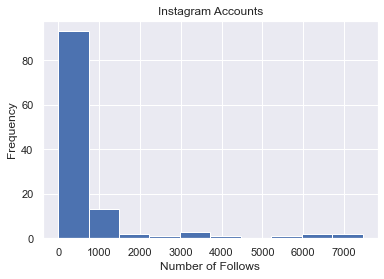

In [13]:
# pandas function for histograms
df['number_of_follows'].hist()
plt.xlabel('Number of Follows')
plt.ylabel('Frequency')
plt.title('Instagram Accounts')
plt.show()

In this graph, the number of follows range is divided into equal width bins.  The height of the bar is the number of observations with number of follows values in that bin.  The total sum of the height of each of these bars should be the total sample size.  We can see that the data has a minimum around 0 and a maximum around 7500.

### Density Histogram

Often we want the **density histogram** instead of the **frequency histogram**.  In this plot, the **area** of each bar represents the **proportion** of the sample in that bin.  In the current version of matplotlib, we specify the option **density=True** to get the density histogram.

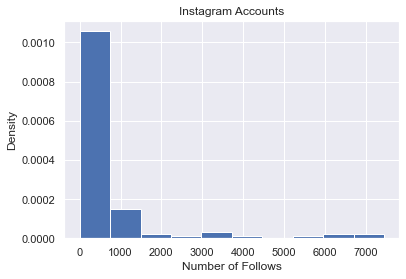

In [14]:
# option for density histogram where area under the curve = 1
df['number_of_follows'].hist(density=True)
plt.xlabel('Number of Follows')
plt.ylabel('Density')
plt.title('Instagram Accounts')
plt.show()

The shape of the density histogram looks the same as the frequency histogram, but it has been normalized to make the total area under the curve equal to 1.

### Density Curve

An alternative graph, using seaborn, includes both the **density histogram** and a smooth fitted **density curve** using the seaborn **`distplot()`** function.  The smooth density curve is another way to represent the distribution of the data, smoothing out some of the random jaggedness due to binning the data in the density histogram.

/Users/jdeeke/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


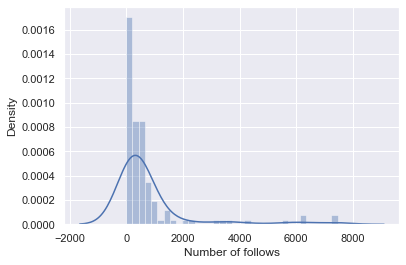

In [15]:
# using seaborn function for histograms and density curves
sns.distplot(df['number_of_follows'])
plt.ylabel('Density')
plt.xlabel('Number of follows')
plt.show()

Note that there is a warning message but the graph is still generated.  For the time being, we will continue to use this graph.  An alternative approach to generate a similar graph is below.  

Note that there is no warning message, but the code to generate quite a bit longer.  You may use either version, if requested.  

Also note that this alternative does require another package called numpy.  You may need to download numpy from the command line using `conda install numpy`

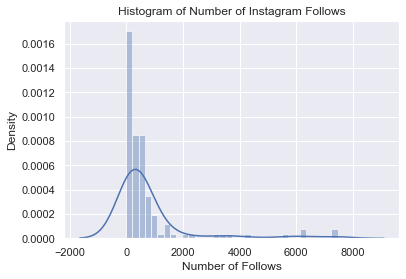

In [16]:
import numpy as np
_, FD_bins = np.histogram(df['number_of_follows'], bins="fd")
bin_nr = min(len(FD_bins)-1, 50)
sns.histplot(data=df, x="number_of_follows", bins=bin_nr, stat="density", 
             alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.title("Histogram of Number of Instagram Follows")
plt.xlabel("Number of Follows")
plt.show()

What determines the vertical scale for the **density histogram** and the superimposed **smooth density curve**?  Each of these graphs represents the **relative frequency**, or the proportion, of values in different age ranges as the area under the curve for those ranges.  So the total area for the whole range must be 1.

### Using Frequency Histograms

How do we estimate the proportion of observations that are within a given range?  

If we wanted the proportion of ages in the sample between 0 and 400, we would either:
- calculate the sum of the areas of the histogram bars for that range (area = base width * height)
- If you have a density curve, some approximation to the area underneath the curve.  In this example, we would approximate the area under the curve between 0 and 400.  Note that if the density curve is not a good approximation for the histogram, these estimations may be very different.

In other words, we need to the area between the two green vertical lines in the figure below.

/Users/jdeeke/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


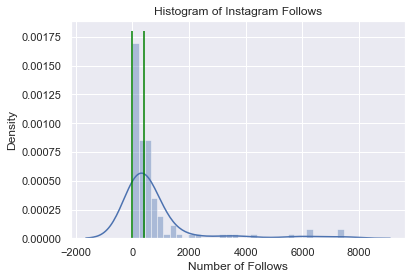

In [17]:
sns.distplot(df['number_of_follows'])
plt.ylabel('Density')
plt.xlabel('Number of Follows')
plt.vlines(x=[0,400], ymin=0, ymax=0.0018, color='green')
plt.title('Histogram of Instagram Follows')
plt.show()

## 4. Summary Statistics for a Single Quantitative Variable

While we can use the histograms above to estimate many characteristics about a histogram, we may want to know the exact value.  For example, from the histogram we can estimate that the minimum number of follows in the sample is around 0.  To verify the actual minimum number of follows in the sample, we compute it using the **`min`** function.

In [18]:
print("Minimum Number of Follows =", df['number_of_follows'].min())

Minimum Number of Follows = 1.0


It looks like we were close with our approximation from the graph.  However, the actual minimum is 1.

We may also want to compute values like the median, mean, standard deviation, first quartile (Q1), third quartile (Q3), and maximum.

In [19]:
print("Median =", df['number_of_follows'].median())
print("Mean =", df['number_of_follows'].mean())
print("Standard Deviation =", df['number_of_follows'].std())
print("First Quartile (Q1) =", df['number_of_follows'].quantile(0.25))
print("Third Quartile (Q3) =", df['number_of_follows'].quantile(0.75))
print("Max =", df['number_of_follows'].max())

Median = 354.5
Mean = 783.8898305084746
Standard Deviation = 1420.1630867217857
First Quartile (Q1) = 109.75
Third Quartile (Q3) = 660.0
Max = 7453.0


That took a lot of typing.  We can simplify this by copying the variable of interest into a pandas Series, say 'x'.

In [20]:
# First define a variable x to be the number_of_follows column in df.
x = df['number_of_follows']

# Then use 'x' instead in the code below (write 'x' takes less time)
print("Median =", x.median())
print("Mean =", x.mean())
print("Standard Deviation =", x.std())
print("First Quartile (Q1) =", x.quantile(0.25))
print("Third Quartile (Q3) =", x.quantile(0.75))
print("Max =", x.max())

Median = 354.5
Mean = 783.8898305084746
Standard Deviation = 1420.1630867217857
First Quartile (Q1) = 109.75
Third Quartile (Q3) = 660.0
Max = 7453.0


We will learn how to **create** and **execute** our own functions in Python to speed up tedious coding exercises like above.

## 5. Coding: Create and Use a Function in Python

What if we wanted to compute these summary statistics for a bunch of variables, or for different data sets?  Python allows us to create our own functions to do general tasks.  The benefit is we don't have to rewrite similar code every time.  Instead, we can just reuse the function.  

Let's make a function to compute the summary statistics listed above.  The structure is as follows:

`def function_name (arguments):
    statements
    return value`
    
In Python, the indentation of the statements and return lines must be 4 characters.  Jupyter notebooks do this indenting automatically as you compose your function.  

In our case, let's have our function put the summary statistics into a data frame for display purposes.

In [21]:
def mysummary(series):
    index = ['min', 'Q1', 'med', 'Q3', 'max', 'mean', 'std']
    value = [series.min(),
            series.quantile(q=0.25),
            series.median(),
            series.quantile(q=0.75),
            series.max(),
            series.mean(),
            series.std()]
    return pd.DataFrame({'value': value}, index=index)

Now that we have defined our function mysummary, we can use it for any quantitative variable.

In [22]:
mysummary(df['number_of_follows'])

,value
min,1.000000
Q1,109.750000
med,354.500000
Q3,660.000000
max,7453.000000
mean,783.889831
std,1420.163087


In [23]:
mysummary(df['number_of_followers'])

,value
min,0.000000e+00
Q1,6.375000e+01
med,2.135000e+02
Q3,6.337500e+02
max,4.021842e+06
mean,5.042895e+04
std,3.848057e+05


What if we wanted to calculate the summary statistics for number_of_follows for fake and real Instagram accounts separately?

In [24]:
print('Number of Follows Summary Statistics for Fake Accounts')
mysummary(df['number_of_follows'][df['account_type']=='fake'])

Number of Follows Summary Statistics for Fake Accounts


,value
min,1.000000
Q1,33.000000
med,163.000000
Q3,784.750000
max,7453.000000
mean,853.933333
std,1607.370923


In [25]:
print('Number of Follows Summary Statistics for Real Accounts')
mysummary(df['number_of_follows'][df['account_type']=='real'])

Number of Follows Summary Statistics for Real Accounts


,value
min,6.000000
Q1,276.000000
med,470.000000
Q3,576.000000
max,7369.000000
mean,711.431034
std,1206.264905


## 6. Subsetting a Data Frame with Index Names

What if we wanted to extract Q1 from the summary?  Previously, we saw how to subset a data frame based on the location number of that entry with the **`.iloc`** function.  Using the **`.loc`** function, we can refer directly to the row **name** in the data frame of results.  Specifying `.value` causes Python to show only the value of the object, suppressing the display of the object type.

In [26]:
results = mysummary(df['number_of_follows'][df['account_type']=='fake'])
results.loc['Q3']

value    784.75
Name: Q3, dtype: float64

In [27]:
results.loc['Q3'].value

784.75

The **interquartile range** is a measure of spread defined as Q3 - Q1.  This is the difference between the 75th and the 25th percentile.  In other words, it is the range of the middle half of the data.  We can compute it from our summary results.

In [28]:
print('IQR =', results.loc['Q3'].value - results.loc['Q1'].value)

IQR = 751.75


## 7. Box Plots

Several of these types of summary statistics can be visualized using the **box plot**, which typically includes the minimum, Q1, median, Q3, maximum, and thresholds for extreme values.

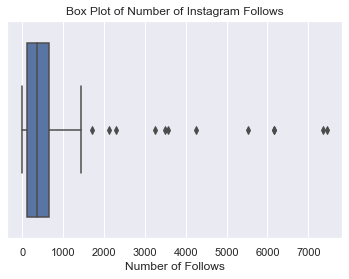

In [29]:
sns.boxplot(x=df['number_of_follows'])
plt.title('Box Plot of Number of Instagram Follows')
plt.xlabel('Number of Follows')
plt.show()

The box plot is generated so that:
- The central box goes from Q1 = 25th percentile to Q3 = 75th percentile
- The central line in the box shows the **median** = 50th percentile (splits the data in half)
- The width of the box is the **interquartile range (IQR)** = Q3 - Q1
- The low and high bars ("whiskers") have a maximum length by default of 1.5 * IQR, meant to be thresholds for flagging possible outliers
- If the minimum and/or maximum is not an outlier, then the whisker extends only to the min and/or max

Box plots are helpful tools to visualize numerical summaries quickly.

## 8. Violin Plots

**Violin plots** are a way to combine many features of a histogram and a box plot into one graph.

You can see a box in the middle of the graph showing the box and whiskers of a traditional boxplot.  You can also see a density curve overlayed on the graph, showing where and how the observations are distributed.

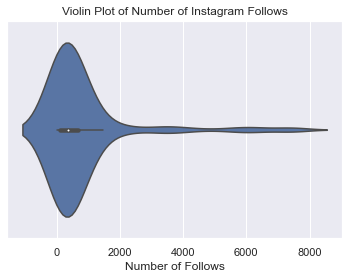

In [30]:
sns.violinplot(x=df['number_of_follows'])
plt.xlabel('Number of Follows')
plt.title('Violin Plot of Number of Instagram Follows')
plt.show()

## 9. Visualizing a Categorical and Quantitative Variable

A single box plot tells us where the major percentials are and flags possible outlier observations but most of the same information can be conveyed by printing the summary statistics.  However, a box plot can be a useful visualization for comparing distributions between two different groups.

The box plot and violin plot are especially helpful as a method to visualize both a categorical and a quantitative variable in one plot.

For example, let's compare the distributions of number of follows for fake vs. real Instagram accounts.

In [31]:
df['account_type'].value_counts()

fake    60
real    58
Name: account_type, dtype: int64

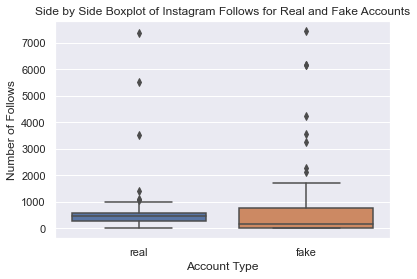

In [32]:
# can specify data frame using the 'data=' argument
sns.boxplot(x='account_type', y='number_of_follows', data=df)
plt.xlabel('Account Type')
plt.ylabel('Number of Follows')
plt.title('Side by Side Boxplot of Instagram Follows for Real and Fake Accounts')
plt.show()

The **violin plot** is an alternative to the boxplot that includes representation of the data density within each group in addition to an embedded box plot.  Because it conveys more information, it has gained in popularity in recent years.

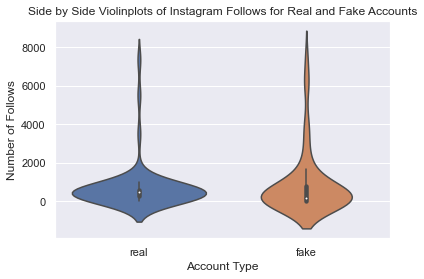

In [33]:
sns.violinplot(x='account_type', y='number_of_follows', data=df)
plt.xlabel('Account Type')
plt.ylabel('Number of Follows')
plt.title('Side by Side Violinplots of Instagram Follows for Real and Fake Accounts')
plt.show()

How do these results compare with your intuition?

What types of questions can we answer using the recent visualizations?

1. Compare the distribution of follows for real and fake accounts in this dataset.
2. Is there a strong association between the account type (real or fake) and the number of follows in this dataset?

<hr>

STAT 207: Julie Deeke, Victoria Ellison, and Douglas Simpson.  University of Illinois at Urbana-Champaign